# Hoja de Trabajo 6

#### Javier Valle, 20159
#### Roberto Ríos, 20979

In [37]:
# Imports necesarios.
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve

### 1. Cree  una  variable  dicotómica  por  cada  una  de  las  categorías  de  la  variable  respuesta categórica que creó en hojas anteriores. Debería tener 3 variables dicotómicas (valores 0 y 1) una que diga si la vivienda es cara o no, media o no, económica o no.

In [38]:
# Abriendo el archivo de csv.
df = pd.read_csv('archivo_clasificado.csv')

# Agarrando el DF y leyendo la clasificación de la casa.
df["Clasificacion"]

# Usando el get_dummies.
dummies = pd.get_dummies(df["Clasificacion"])

# Eliminamos la última columna del DataFrame
dummies = dummies.drop(dummies.columns[-1], axis=1)

print(dummies)

# Renombreando las columnas.
dummies = dummies.rename(columns={0: 'vivienda_económica', 1: 'vivienda_media', 2: 'vivienda_cara'})

# Uniendo los DF.
df = pd.concat([df, dummies], axis=1)

df

      0  1  2
0     0  1  0
1     1  0  0
2     0  1  0
3     1  0  0
4     0  1  0
...  .. .. ..
1455  1  0  0
1456  0  1  0
1457  0  1  0
1458  1  0  0
1459  1  0  0

[1460 rows x 3 columns]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Precio,Clasificacion,vivienda_económica,vivienda_media,vivienda_cara
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,208500,1,0,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,181500,0,1,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,223500,1,0,1,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,140000,0,1,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,250000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,8,2007,WD,Normal,175000,175000,0,1,0,0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,2,2010,WD,Normal,210000,210000,1,0,1,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,5,2010,WD,Normal,266500,266500,1,0,1,0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,4,2010,WD,Normal,142125,142125,0,1,0,0


### 2. Use los mismos conjuntos de entrenamiento y prueba que utilizó en las hojas anteriores.

Clasificación:  0       1
1       0
2       1
3       0
4       1
       ..
1455    0
1456    1
1457    1
1458    0
1459    0
Name: Clasificacion, Length: 1460, dtype: int64
Precisión: 0.9931506849315068
OverallCond:  0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64
Precisión: 0.639269406392694
Predicción: [5 5 5 6 5 8 5 5 5 5 5 5 5 5 5 5 5 5 8 7 5 5 5 5 5 6 5 5 5 5 5 5 6 5 5 5 5
 5 5 5 6 5 5 5 5 5 8 5 5 7 5 5 5 5 5 5 7 5 5 6 7 5 7 5 5 5 7 5 7 5 5 6 5 5
 6 5 5 5 5 7 5 7 7 5 7 5 5 5 5 5 5 5 5 5 5 5 5 6 7 7 5 5 7 5 7 7 5 6 5 7 7
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 5 5 5 5 7 5 8 5 5 7 5 5 5 7
 5 5 5 5 5 6 6 5 8 5 5 8 5 5 5 5 5 7 7 5 5 5 5 5 5 5 6 7 7 6 5 5 6 6 5 5 6
 5 5 5 5 5 5 7 5 5 7 5 5 7 6 6 5 5 6 5 7 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5
 7 7 5 5 5 7 7 5 5 7 5 5 5 7 5 7 5 6 5 5 5 5 6 5 5 5 7 5 8 5 6 5 5 5 8 5 5
 5 5 5 6 8 5 5 6 5 7 5 7 7 5 7 6 5 8 7 5 5 5 5 5 5 5 5 5 5 5

[Text(0.5431034482758621, 0.9, '5 <= 1983.5\ngini = 0.639\nsamples = 1022\nvalue = [1, 5, 17, 45, 564, 187, 137, 52, 14]'),
 Text(0.27586206896551724, 0.7, '5 <= 1983.5\ngini = 0.776\nsamples = 615\nvalue = [1, 4, 17, 45, 180, 174, 130, 51, 13]'),
 Text(0.13793103448275862, 0.5, '5 <= 0.5\ngini = 0.715\nsamples = 431\nvalue = [1, 4, 16, 39, 169, 139, 56, 7, 0]'),
 Text(0.06896551724137931, 0.3, '5 <= 0.5\ngini = 0.673\nsamples = 84\nvalue = [0, 1, 1, 7, 17, 41, 17, 0, 0]'),
 Text(0.034482758620689655, 0.1, 'gini = 0.612\nsamples = 68\nvalue = [0, 0, 0, 5, 15, 38, 10, 0, 0]'),
 Text(0.10344827586206896, 0.1, 'gini = 0.734\nsamples = 16\nvalue = [0, 1, 1, 2, 2, 3, 7, 0, 0]'),
 Text(0.20689655172413793, 0.3, '5 <= 1959.5\ngini = 0.705\nsamples = 347\nvalue = [1, 3, 15, 32, 152, 98, 39, 7, 0]'),
 Text(0.1724137931034483, 0.1, 'gini = 0.778\nsamples = 162\nvalue = [1, 3, 10, 26, 50, 45, 22, 5, 0]'),
 Text(0.2413793103448276, 0.1, 'gini = 0.604\nsamples = 185\nvalue = [0, 0, 5, 6, 102, 53, 1

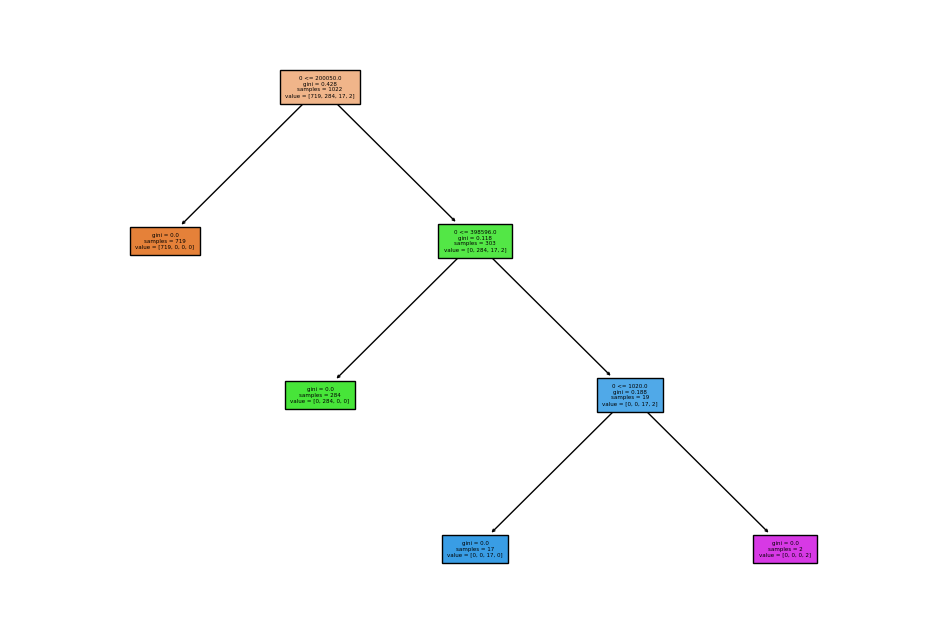

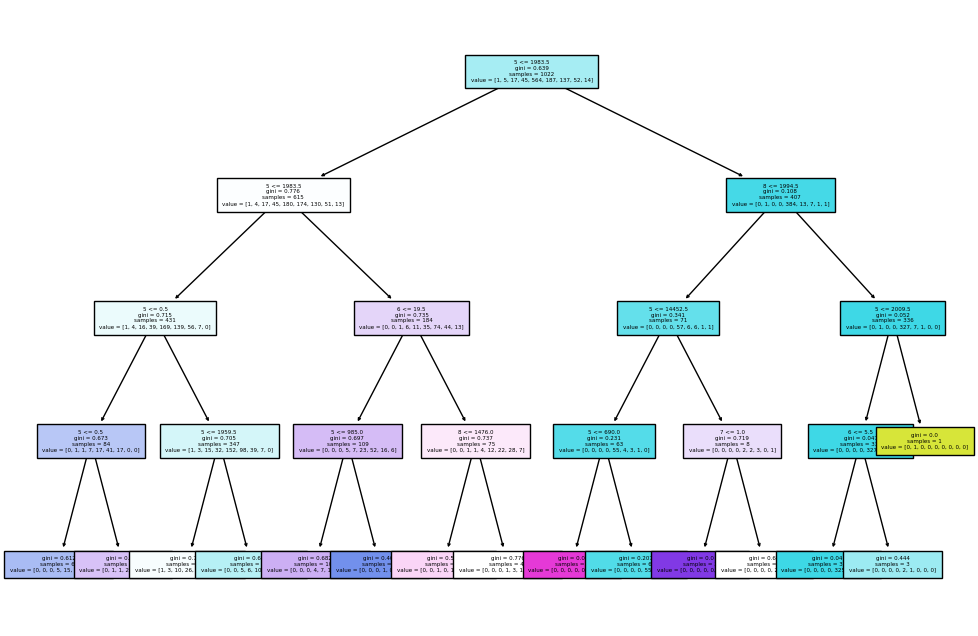

In [39]:

# Conjuntos de entrenamiento y prueba de la Hoja 5.

# Abriendo el archivo clasficado.
datos = pd.read_csv('archivo_clasificado.csv')

# Limpieza de datos.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

# Pasando todo a un Dataframe.
x = pd.DataFrame()
x[num] = datos[num]
x[cat] = datos[cat].apply(lambda x: pd.factorize(x)[0])
res = 'Clasificacion'
X = x.drop(res, axis=1)
y = datos[res]

# Imprimiendo la clasificación.
print("Clasificación: ", y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# # Accurancy.
print("Precisión:", clf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, fontsize=4, feature_names=y, filled=True)

# Abriendo el archivo clasficado.
datos = pd.read_csv('archivo_clasificado.csv')

# Limpieza de datos.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

# Pasando todo a un Dataframe.
x = pd.DataFrame()
x[num] = datos[num]
x[cat] = datos[cat].apply(lambda x: pd.factorize(x)[0])
res = 'OverallCond'
X = x.drop(res, axis=1)
y = datos[res]

# Imprimiendo la clasificación.
print("OverallCond: ", y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)


# Accurancy.
print("Precisión:", clf.score(X_test, y_test))

# Haciendo una predicción.
y_pred = clf.predict(X_test)

print("Predicción:", y_pred)

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, fontsize=4, feature_names=y, filled=True)

### 3. Elabore  un  modelo  de  regresión  logística  para  conocer  si  una  vivienda  es  cara  o  no, utilizando el conjunto de entrenamiento y explique los resultados a los que llega. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código. Use validación cruzada. 

In [40]:
# Abriendo el archivo de csv.
df = pd.read_csv('archivo_clasificado.csv')

# Agarrando el DF y leyendo la clasificación de la casa.
df["Clasificacion"]

# Usando el get_dummies.
dummies = pd.get_dummies(df["Clasificacion"])

# Eliminamos la última columna del DataFrame
dummies = dummies.drop(dummies.columns[-1], axis=1)

print(dummies)

# Renombreando las columnas.
dummies = dummies.rename(columns={0: 'vivienda_económica', 1: 'vivienda_media', 2: 'vivienda_cara'})

# Uniendo los DF.
df = pd.concat([df, dummies], axis=1)

df

df = pd.get_dummies(df)

# Definir las variables predictoras y la variable objetivo
X = df.drop(['Clasificacion', 'vivienda_económica', 'vivienda_media', 'vivienda_cara'], axis=1)
y = df['vivienda_cara']

X = df.dropna().drop(['Clasificacion', 'vivienda_económica', 'vivienda_media', 'vivienda_cara'], axis=1)
y = df.dropna()['vivienda_cara']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión logística
logreg = LogisticRegression()

# Entrenar el modelo
logreg.fit(X_train, y_train)

# Realizar validación cruzada para obtener un score más preciso
scores = cross_val_score(logreg, X, y, cv=5)
print('Scores de validación cruzada:', scores)

# Calcular el score en el conjunto de prueba
score = logreg.score(X_test, y_test)
print('Score en el conjunto de prueba:', score)


      0  1  2
0     0  1  0
1     1  0  0
2     0  1  0
3     1  0  0
4     0  1  0
...  .. .. ..
1455  1  0  0
1456  0  1  0
1457  0  1  0
1458  1  0  0
1459  1  0  0

[1460 rows x 3 columns]


c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Scores de validación cruzada: [0.98222222 0.97767857 0.97767857 0.97767857 0.98214286]
Score en el conjunto de prueba: 0.9792284866468842


### 4. Analice el modelo. Determine si hay multicolinealidad en las variables, y cuáles son las que aportan  al  modelo,  por  su  valor  de  significación.  Haga  un  análisis  de  correlación  de  las variables del modelo y especifique si el modelo se adapta bien a los datos. 

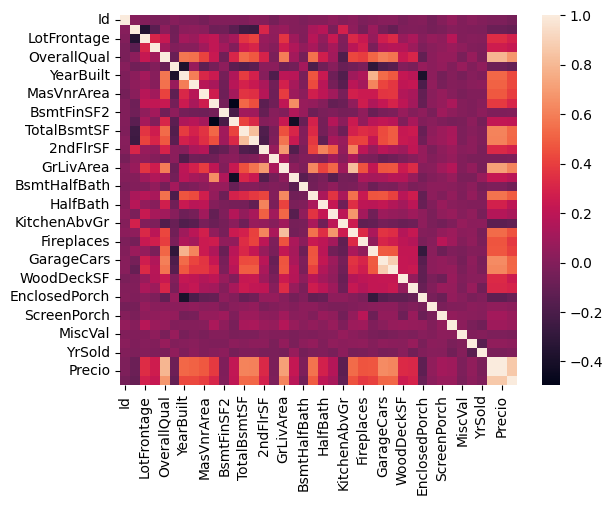

c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


      VIF Factor       features
13           inf       1stFlrSF
11           inf      BsmtUnfSF
38           inf         Precio
16           inf      GrLivArea
15           inf   LowQualFinSF
14           inf       2ndFlrSF
12           inf    TotalBsmtSF
37           inf      SalePrice
9            inf     BsmtFinSF1
10           inf     BsmtFinSF2
36  2.515925e+04         YrSold
25  2.297651e+04    GarageYrBlt
7   2.250568e+04   YearRemodAdd
6   2.163227e+04      YearBuilt
23  8.451985e+01   TotRmsAbvGrd
4   7.665164e+01    OverallQual
5   4.273943e+01    OverallCond
22  3.774934e+01   KitchenAbvGr
26  3.741101e+01     GarageCars
27  3.229746e+01     GarageArea
21  3.195383e+01   BedroomAbvGr
19  2.671014e+01       FullBath
2   1.749648e+01    LotFrontage
35  6.651258e+00         MoSold
39  5.663694e+00  Clasificacion
1   4.817962e+00     MSSubClass
0   4.122003e+00             Id
17  3.727958e+00   BsmtFullBath
20  3.453755e+00       HalfBath
24  3.038502e+00     Fireplaces
3   2.68

In [41]:
# Abriendo el archivo de datos clasificados.
datos = pd.read_csv('archivo_clasificado.csv')

# Imputar valores faltantes con la media
datos = datos.fillna(datos.mean())

# Crear matriz de correlación y heatmap
corr_matrix = datos.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

# Seleccionar variables numéricas
X = datos.select_dtypes(include=['number'])

# Calcular VIF para cada variable numérica
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Imprimir tabla de VIFs ordenada por valor descendente
print(vif.sort_values("VIF Factor", ascending=False))

# Agregar columna de unos para intercepto
X = add_constant(X)

# Realizar regresión múltiple

model = OLS(datos["OverallCond"], X).fit()
#model = OLS(datos["SalePrice"], X).fit()

# Imprimir estadísticas de modelo
print(model.summary())

### 5. Utilice  el  modelo  con  el  conjunto  de  prueba  y  determine  la  eficiencia  del  algoritmo  para clasificar.

In [42]:
# cargar el conjunto de prueba
datos_prueba = pd.read_csv('archivo_clasificado.csv')

# imputar valores faltantes con la media
datos_prueba = datos_prueba.fillna(datos_prueba.mean())

modelo = OLS(datos["OverallCond"], X).fit()

# codificar las variables categóricas
encoder = LabelEncoder()
for col in cat:
    datos_prueba[col] = encoder.fit_transform(datos_prueba[col])

# crear una columna "const" en datos_prueba
datos_prueba['const'] = 1

# hacer las predicciones en el conjunto de prueba
X_prueba = add_constant(datos_prueba[X.columns])
y_pred = modelo.predict(X_prueba)

# calcular R-cuadrado para evaluar la eficiencia del modelo
r_squared = r2_score(datos_prueba["OverallCond"], y_pred)

print('El R-cuadrado del modelo en el conjunto de prueba es:', r_squared)


El R-cuadrado del modelo en el conjunto de prueba es: 1.0


### 6. Explique  si  hay  sobreajuste  (overfitting)  o  no  (recuerde  usar  para  esto  los  errores  del conjunto  de  prueba  y  de  entrenamiento).  Muestre  las  curvas  de  aprendizaje  usando  los errores de los conjuntos de entrenamiento y prueba.

Error de entrenamiento: 0.008144870219341654
Error del test: 0.10793576933340339


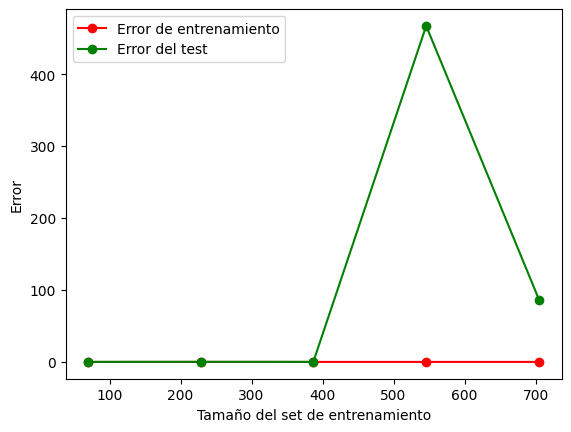

No hay overfit


In [43]:
datos = pd.read_csv('archivo_clasificado.csv')

# One-hot encoding for categorical variables

# Obteniendo las columnas catgóricas.
cat = datos.select_dtypes(include=['object']).columns
datos = pd.get_dummies(datos, columns=datos.select_dtypes(include=['object']).columns)

# Separando las variables dependientes e independientes
X = datos.drop(['OverallCond'], axis=1)
# Quitando los NaN.
X = X.dropna()
y = y.drop(X.index.difference(X.dropna().index))

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creando un modelo de regresión lineal y ajustándolo con los datos de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Calculando los errores de entrenamiento y prueba
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))

print("Error de entrenamiento:", train_error)
print("Error del test:", test_error)

# Creando curvas de aprendizaje para visualizar los errores de entrenamiento y prueba como una función del tamaño del conjunto de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Error de entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Error del test")
plt.legend(loc="best")
plt.xlabel("Tamaño del set de entrenamiento")
plt.ylabel("Error")
plt.show()

# Evaluando para overfitting
if train_error < test_error:
    print("No hay overfit")
else:
    print("Sí hay overfit")

7. Haga otros dos modelos cambiando las variables predictoras de acuerdo con la significación de los coeficientes en el primer modelo. Explique por qué seleccionó las variables que uso para cada modelo.

Para seleccionar las variables más significativas, se puede utilizar una prueba estadística de significación o análisis de correlación. En este caso, la relación con la variable dependiente determina por el porcentaje de error.

In [44]:
# Selección de variables
X = datos[['GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea']]
y = datos['OverallCond']

# Eliminando NaNs
X = X.dropna()
y = y.drop(X.index.difference(X.dropna().index))

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creando un modelo de regresión lineal y ajustándolo con los datos de entrenamiento
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Calculando los errores de entrenamiento y prueba
train_error = mean_squared_error(y_train, model1.predict(X_train))
test_error = mean_squared_error(y_test, model1.predict(X_test))

print("Modelo 1")
print("Error de entrenamiento:", train_error)
print("Error del test:", test_error)

# Creando un modelo de regresión lineal y ajustándolo con los datos de entrenamiento
model2 = LogisticRegression()
model2.fit(X_train, y_train)


# Calculando los errores de entrenamiento y prueba
train_error = mean_squared_error(y_train, model2.predict(X_train))
test_error = mean_squared_error(y_test, model2.predict(X_test))

print("\nModelo 2")
print("Error de entrenamiento:", train_error)
print("Error del test:", test_error)


Modelo 1
Error de entrenamiento: 1.1776617069458835
Error del test: 1.184451623690158

Modelo 2
Error de entrenamiento: 1.5900195694716244
Error del test: 1.6461187214611872


c:\Users\paqui\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


8. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores, el tiempo y la memoria consumida. Para esto último puede usar “profvis” si trabaja con R y “cProfile” en Python

RESULTADOS DE PROFILER: 
         128983 function calls (127282 primitive calls) in 0.250 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.249    0.249 2877238353.py:39(my_function)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(all)
        1    0.000    0.000    0.001    0.001 <__array_function__ internals>:2(amax)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amin)
      143    0.000    0.000    0.004    0.000 <__array_function__ internals>:2(any)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(argmax)
        6    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_1d)
       17    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(broadcast_arrays)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(can_cast)
        1    0.000   

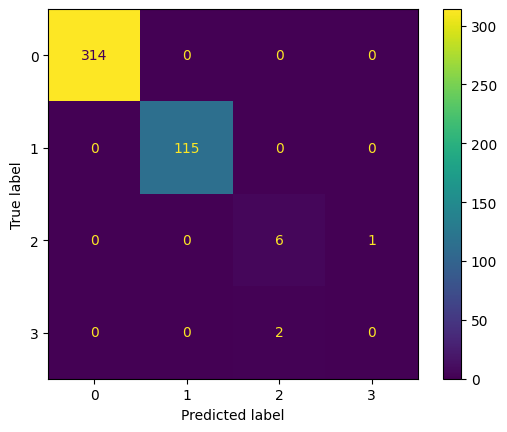

In [61]:
# Importar las bibliotecas necesarias
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import cProfile
import pstats
from pandas import read_csv, DataFrame, factorize
from sklearn.model_selection import train_test_split

# Cargar y limpiar el conjunto de datos
data = read_csv('archivo_clasificado.csv')
data = data.replace(to_replace='',value=0)
data = data.fillna(0)
cat = data.select_dtypes(include=['object']).columns.to_list()
num = data.select_dtypes(include=['number']).columns.to_list()
x = DataFrame()
x[num] = data[num]
x[cat] = data[cat].apply(lambda x: factorize(x)[0])
res = 'Clasificacion'
X = x.drop(res, axis=1)
y = data[res]



# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)



# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)



def my_function():
    
    cm = confusion_matrix(y_test, y_pred, labels=y)
    ConfusionMatrixDisplay.from_estimator(
        clf, X_test, y_test)

print("RESULTADOS DE PROFILER: ")
cProfile.run('my_function()')


9. Determine cual de todos los modelos es mejor, puede usar AIC y BIC para esto, además de
los parámetros de la matriz de confusión y los del profiler

In [63]:
from sklearn import tree
from sklearn.metrics import accuracy_score



# Crear 3 modelos de árbol de decisión
clf1 = tree.DecisionTreeClassifier( max_depth=3 )
clf2 = tree.DecisionTreeClassifier( max_depth=20 )
clf3 = tree.DecisionTreeClassifier( max_depth=100 )



# Entrenar los clasificadores en el conjunto de entrenamiento
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)


# Realizar predicciones en el conjunto de prueba
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)


# Evalúa la precisión de las 3 

# Calcular las métricas de evaluación 1
accuracy1 = accuracy_score(y_test, y_pred1)


# Imprimir los resultados
print('\nModelo 1\n')
print('Exactitud: ', accuracy1)


# Calcular las métricas de evaluación 2
accuracy2 = accuracy_score(y_test, y_pred2)


# Imprimir los resultados
print('\nModelo 2\n')
print('Exactitud: ', accuracy2)


# Calcular las métricas de evaluación 3
accuracy3 = accuracy_score(y_test, y_pred3)


# Imprimir los resultados
print('\nModelo 3\n')
print('Exactitud: ', accuracy3)


Modelo 1

Exactitud:  0.997716894977169

Modelo 2

Exactitud:  0.9931506849315068

Modelo 3

Exactitud:  1.0


10. Haga un modelo de árbol de decisión, uno de Random Forest y uno de Naive Bayes usando
la misma variable respuesta y los mismos predictores que el mejor de los modelos de
Regresión Logística

In [71]:


# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)


# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)


# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.997716894977169


11. Compare la eficiencia de los 3 modelos que creó en el punto anterior y el mejor de los de
regresión logística ¿Cuál se demoró más en procesar?¿Cuál se equivocó más?¿Cuál se
equivocó menos?¿por qué?

#### Segun los resultados del profiler, el que tuvo el menor rendimiento fue la regresion logistica, sin embargo, en terminos de su exactitud es mejor al utilizar las variables solicitadas en el inciso 8.

RESULTADOS DE PROFILER: 
Exactitud:  0.9885844748858448
(1460, 1460)
         436892 function calls (432334 primitive calls) in 1.013 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.012    1.012 2093553691.py:4(randomF)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(all)
      101    0.000    0.000    0.002    0.000 <__array_function__ internals>:2(amax)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amin)
      244    0.001    0.000    0.008    0.000 <__array_function__ internals>:2(any)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(argmax)
      109    0.000    0.000    0.002    0.000 <__array_function__ internals>:2(atleast_1d)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(average)
      100    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(b

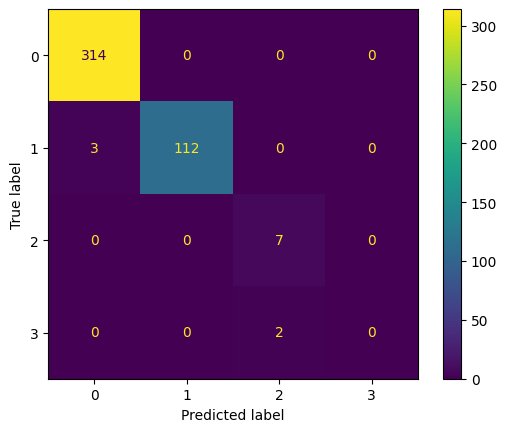

In [68]:
from sklearn.ensemble import RandomForestClassifier


def randomF():
    # Crear el modelo de Random Forest con 100 árboles
    rf = RandomForestClassifier(n_estimators=100, random_state=0)

    # Entrenar el modelo
    rf.fit(X_train, y_train)

    # Predecir los resultados para el conjunto de prueba
    y_pred = rf.predict(X_test)


    # Calcular las métricas de evaluación 1
    accuracy = accuracy_score(y_test, y_pred)


    # Imprimir los resultados
    print('Exactitud: ', accuracy)


    # ver la matriz de confusion
    cmf = confusion_matrix(y_test, y_pred, labels=y)

    print(cmf.shape)
    ConfusionMatrixDisplay.from_estimator(
        rf, X_test, y_test)


print("RESULTADOS DE PROFILER: ")
cProfile.run('randomF()')